Домашнее задание курса "Статистика в Python" - исследование и визуализация датасета World Happiness Report. 

Источник данных - https://www.kaggle.com/datasets/unsdsn/world-happiness?resource=download&select=2015.csv

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from textwrap import wrap

Описание атрибутов датасета:

Country – Name of the country

Region – Region the country belongs to

Happiness Rank – Country’s rank based on happiness score

Happiness Score – Score measured by asking sampled people how they would rate their happiness.

Standard Error – The standard error of the happiness score

Economy (GDP per Capita) – The extent to which GDP contributes to the calculation of happiness score

Family - The extent to which Family contributes to the calculation of happiness score

Health (Life Expectancy) - The extent to which health contributes to the calculation of happiness score

Freedom - The extent to which Freedom contributes to the calculation of happiness score

Trust (Government Corruption) - The extent to which perception of corruption contributes to the calculation of happiness score

Generosity – The extent to which Generosity contributes to the calculation of happiness score

Dystopia Residual – It is the sum of the dystopia happiness score (1.85) ie score of a hypothetical country having rank lower than the lowest ranking country in the report, plus the residual value of each country which is a number left over from the normalization of the variables which cannot be explained).

К сожалению пять файлов датасета имеют три различных схемы данных, поэтому необходима обработка каждого датасета: переименование атрибутов, удаление и добавление колонок, маппинг регионов. Я оставил в датасете только те атрибуты, которые встречаются во всех пяти файлах. 

In [23]:
# чтение файла 2015 года
p1 = pd.read_csv('2015.csv')
p1 = p1[['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']]
p1.rename(columns = {'Economy (GDP per Capita)' : 'GDP', 'Health (Life Expectancy)' : 'Health', 'Trust (Government Corruption)' : 'Corruption'}, inplace = True)
p1['Year'] = '2015'


In [24]:
# формирование словаря регионов
regs = pd.Series(p1['Region'].values, index = p1['Country']).to_dict()


In [25]:
# чтение файла 2016 года
p2 = pd.read_csv('2016.csv')
p2 = p2[['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']]
p2.rename(columns = {'Economy (GDP per Capita)' : 'GDP', 'Health (Life Expectancy)' : 'Health', 'Trust (Government Corruption)' : 'Corruption'}, inplace = True)
p2['Year'] = '2016'


In [26]:
# чтение файла 2017 года
p3 = pd.read_csv('2017.csv')
p3.rename(columns = {'Happiness.Rank' : 'Happiness Rank', 
                     'Happiness.Score' : 'Happiness Score',
                     'Economy..GDP.per.Capita.': 'GDP', 
                     'Health..Life.Expectancy.' : 'Health', 
                     'Trust..Government.Corruption.' : 'Corruption'}, inplace = True)
p3 = p3[['Country', 'Happiness Rank', 'Happiness Score', 'GDP', 'Health', 'Freedom', 'Corruption', 'Generosity']]
p3['Year'] = '2017'
p3['Region'] = p3['Country'].map(regs)
p3.insert(1, 'Region', p3.pop('Region'))


In [27]:
# чтение файла 2018 года
p4 = pd.read_csv('2018.csv')
p4.rename(columns = {'Overall rank' : 'Happiness Rank', 
                     'Country or region' : 'Country', 
                     'Score' : 'Happiness Score',
                     'GDP per capita': 'GDP', 
                     'Healthy life expectancy' : 'Health', 
                     'Freedom to make life choices' : 'Freedom', 
                     'Perceptions of corruption' : 'Corruption'}, inplace = True)
p4 = p4[['Country', 'Happiness Rank', 'Happiness Score', 'GDP', 'Health', 'Freedom', 'Corruption', 'Generosity']]
p4['Year'] = '2018'
p4['Region'] = p4['Country'].map(regs)
p4.insert(1, 'Region', p4.pop('Region'))


In [28]:
# чтение файла 2019 года
p5 = pd.read_csv('2019.csv')
p5.rename(columns = {'Overall rank' : 'Happiness Rank', 
                     'Country or region' : 'Country', 
                     'Score' : 'Happiness Score',
                     'GDP per capita': 'GDP', 
                     'Healthy life expectancy' : 'Health', 
                     'Freedom to make life choices' : 'Freedom', 
                     'Perceptions of corruption' : 'Corruption'}, inplace = True)
p5 = p5[['Country', 'Happiness Rank', 'Happiness Score', 'GDP', 'Health', 'Freedom', 'Corruption', 'Generosity']]
p5['Year'] = '2019'
p5['Region'] = p5['Country'].map(regs)
p5.insert(1, 'Region', p5.pop('Region'))


In [29]:
# соединение всех таблиц в единый датасет
df = pd.concat([p1, p2, p3, p4, p5], ignore_index = True, axis = 0)


In [30]:
# оставим в таблице только страны, встречающиеся во всех годах наблюдений
df = df.groupby('Country').filter(lambda x : len(x) == 5)


In [31]:
# проверка на отсутствующие значения
df.isna().sum()

Country            0
Region             0
Happiness Rank     0
Happiness Score    0
GDP                0
Health             0
Freedom            0
Corruption         1
Generosity         0
Year               0
dtype: int64

In [32]:
df[df['Corruption'].isna()]

,Country,Region,Happiness Rank,Happiness Score,GDP,Health,Freedom,Corruption,Generosity,Year
489,United Arab Emirates,Middle East and Northern Africa,20,6.774,2.096,0.67,0.284,NaN,0.186,2018


Единственное отсутствующее значение не помешает построению графиков, поэтому игнорирую его

In [33]:
df.shape

(705, 10)

In [34]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,GDP,Health,Freedom,Corruption,Generosity,Year
0,Switzerland,Western Europe,1,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,5,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,2015


In [35]:
# График 1. Динамика индекса счастья в России, Западной Европе и в мире

# подготовка данных
g1 = df.groupby('Year')['Happiness Score'].mean().to_frame(name = 'World')
g1['Western Europe'] = df[df['Region'] == 'Western Europe'].groupby('Year')['Happiness Score'].mean()
g1['Russia'] = df[df['Country'] == 'Russia']['Happiness Score'].values


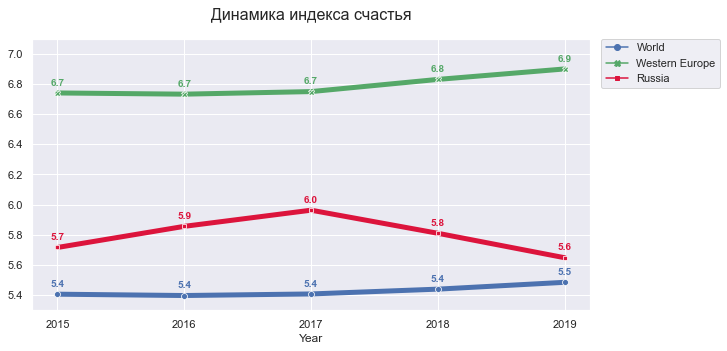

In [36]:
fig = plt.subplots(figsize = (10, 5))
sns.set_theme()
gg1 = sns.lineplot(data = g1, markers = True, dashes = False, palette = ['C0', 'C2', '#DC143C'], linewidth = 5)
gg1.axes.set_title('Динамика индекса счастья', fontsize = 16, y = 1.05)
lgd = plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)
gg1.set_ylim(5.3, 7.1)

for x, y in zip(g1.index.values, g1['World']):
    plt.text(x = x, y = y + 0.05, s = f'{y:.1f}', ha = 'center', color = 'C0', weight = 'semibold', fontsize = 10)
for x, y in zip(g1.index.values, g1['Western Europe']):
    plt.text(x = x, y = y + 0.05, s = f'{y:.1f}', ha = 'center', color = 'C2', weight = 'semibold', fontsize = 10)
for x, y in zip(g1.index.values, g1['Russia']):
    plt.text(x = x, y = y + 0.05, s = f'{y:.1f}', ha = 'center', color = '#DC143C', weight = 'semibold', fontsize = 10)

plt.show()

В 2015-2017 гг. Индекс счастья населения России был заметно выше среднемирового и быстро рос. Но, начиная с 2018 года индекс начал быстро падать, в то время как мировой индекс и европейский индекс росли. Интересно, что случилось в России в 2018 году?

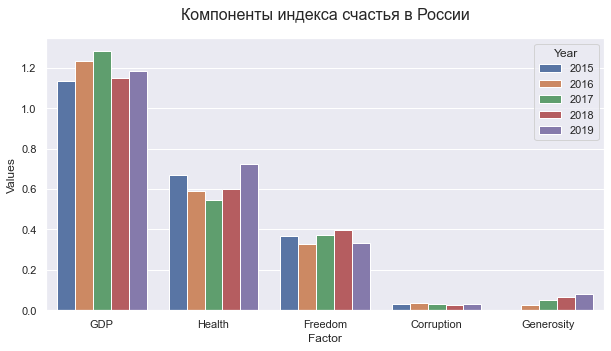

In [37]:
# График 2. Компоненты индекса счастья России
fig = plt.subplots(figsize = (10, 5))
df1 = df[df['Country'] == 'Russia'][['GDP', 'Health', 'Freedom', 'Corruption', 'Generosity', 'Year']]
df2 = df1.melt(id_vars = 'Year', value_name = 'Values', var_name = 'Factor')
ax = sns.barplot(x = df2['Factor'], y = 'Values', data = df2, hue = 'Year')
ax.axes.set_title('Компоненты индекса счастья в России', fontsize = 16, y = 1.05);


Судя по всему, главной причиной падения индекса в 2018 году стало существенное уменьшение ВВП на душу населения. Стоит обратить внимание на то, что индекс продолжил падение и в 2019 году, хотя ВВП на душу населения уже увеличилось. Можно предположить, что на падение индекса повлияло уменьшение фактора свободы, но чтобы ответить на этот вопрос, нужно читать методику расчета индекса, что, кажется, выходит за рамки исследования. 

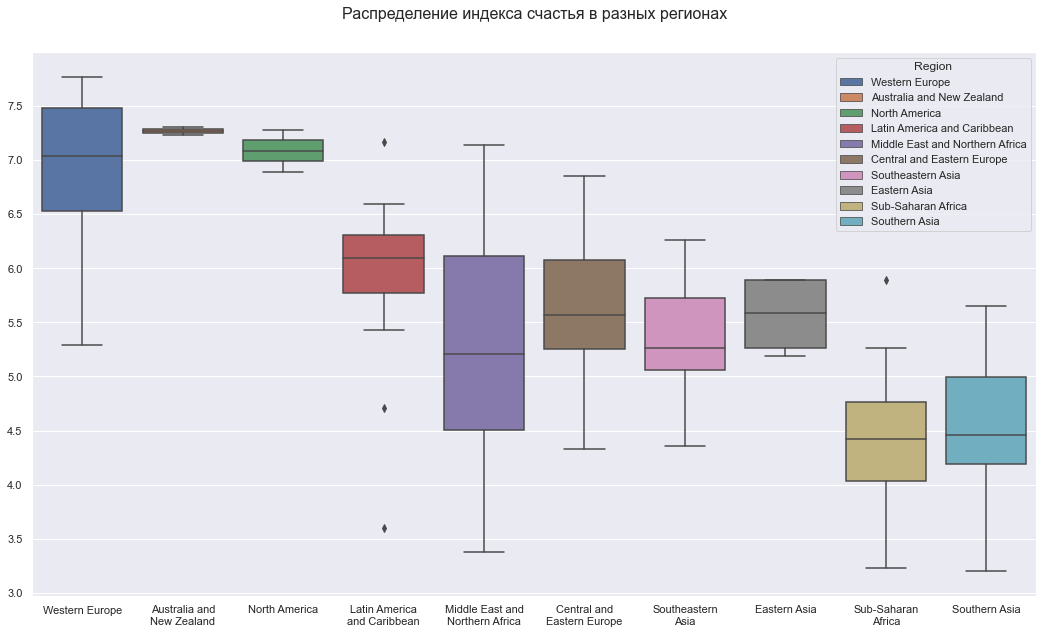

In [38]:
# График 3. Распределение индекса счастья в различных регионах в 2019 году

fig = plt.subplots(figsize = (18, 10))
gg2 = sns.boxplot(x = 'Region', y = 'Happiness Score', hue = 'Region', data = df[df['Year'] == '2019'], dodge = False)
gg2.axes.set_title('Распределение индекса счастья в разных регионах', fontsize = 16, y = 1.05)
gg2.set(xlabel = None)
gg2.set(ylabel = None)

labels = gg2.axes.get_xticklabels()
for v in labels:
    text = v.get_text()
    text = '\n'.join(wrap(text, 15))
    v.set_text(text)
gg2.axes.set_xticklabels(labels)    

gg2.set_yticks(list(np.arange(3, 8, 0.5)))

plt.show()

На диаграмме явно видно неравенство отдельных регионов. Экономически развитые страны имеют более высокий индекс, бедные "южные" страны - более низкий. Есть регионы с очень большим разбросом индекса - например, Ближний Восток и Северная Африка, но это и понятно, т.к. в этом регионе достаточно много конфликтов и страны в них участвующие вряд ли будут счастливыми. Интересно, что на диаграмме очень мало выбросов - три в Латинской Америке - Гаити и Венесуэла и очень счастливая Коста-Рика (единственная страна в мире в которой нет армии!), в Африке своим счастьем выделяется маленький островной Маврикий.


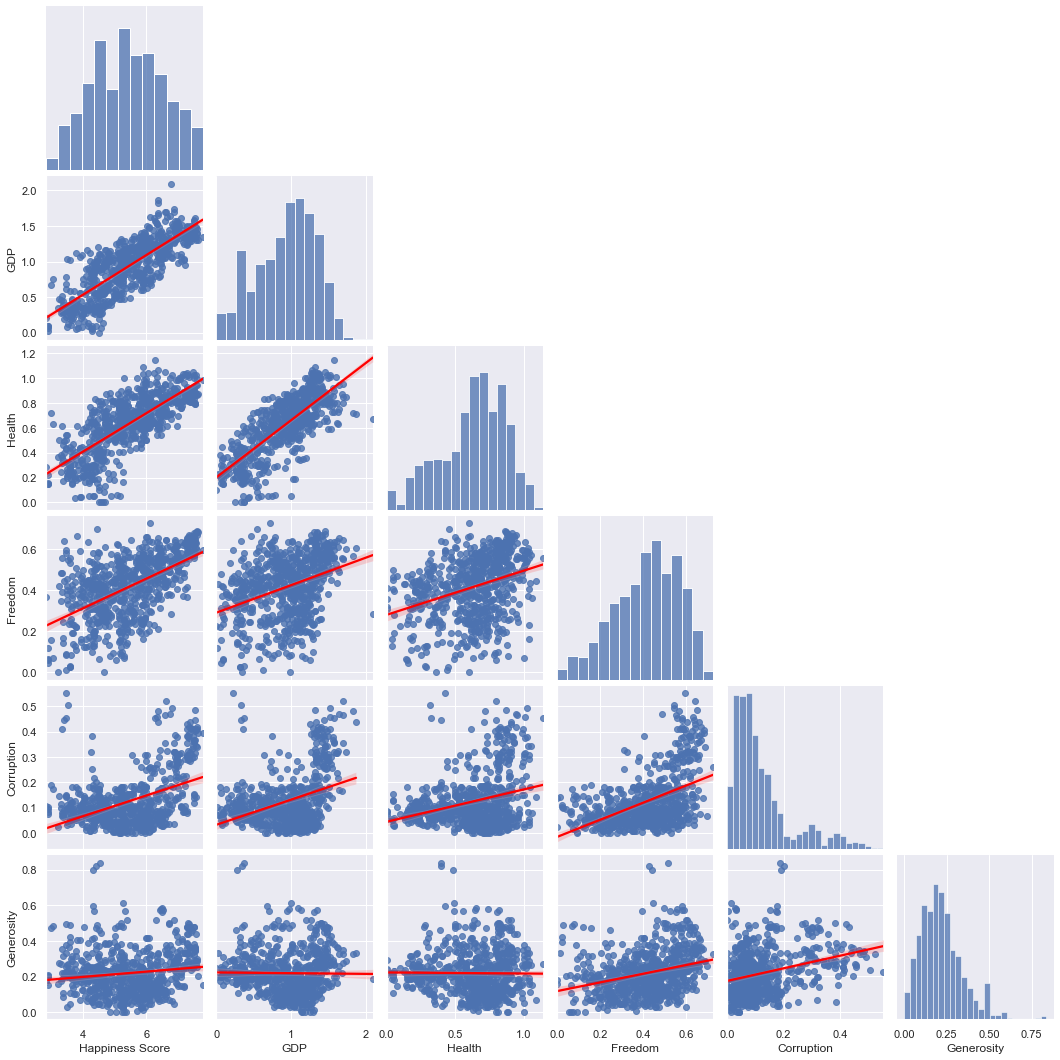

In [39]:
# График 4. Пробуем объяснить составляющие счастья
sns.pairplot(df[['Happiness Score', 'GDP', 'Health', 'Freedom', 'Corruption', 'Generosity']], kind = 'reg', corner = True, plot_kws = {'line_kws': {'color' : 'red'}}, diag_kind = 'hist');


На графике видно, что все переменные (кроме разве что щедрости) существенно коррелируют между собой, что в принципе можно было ожидать - понятно, что чем выше доход, тем больше средств можно тратить на медицину и тем лучше будет здоровье. 

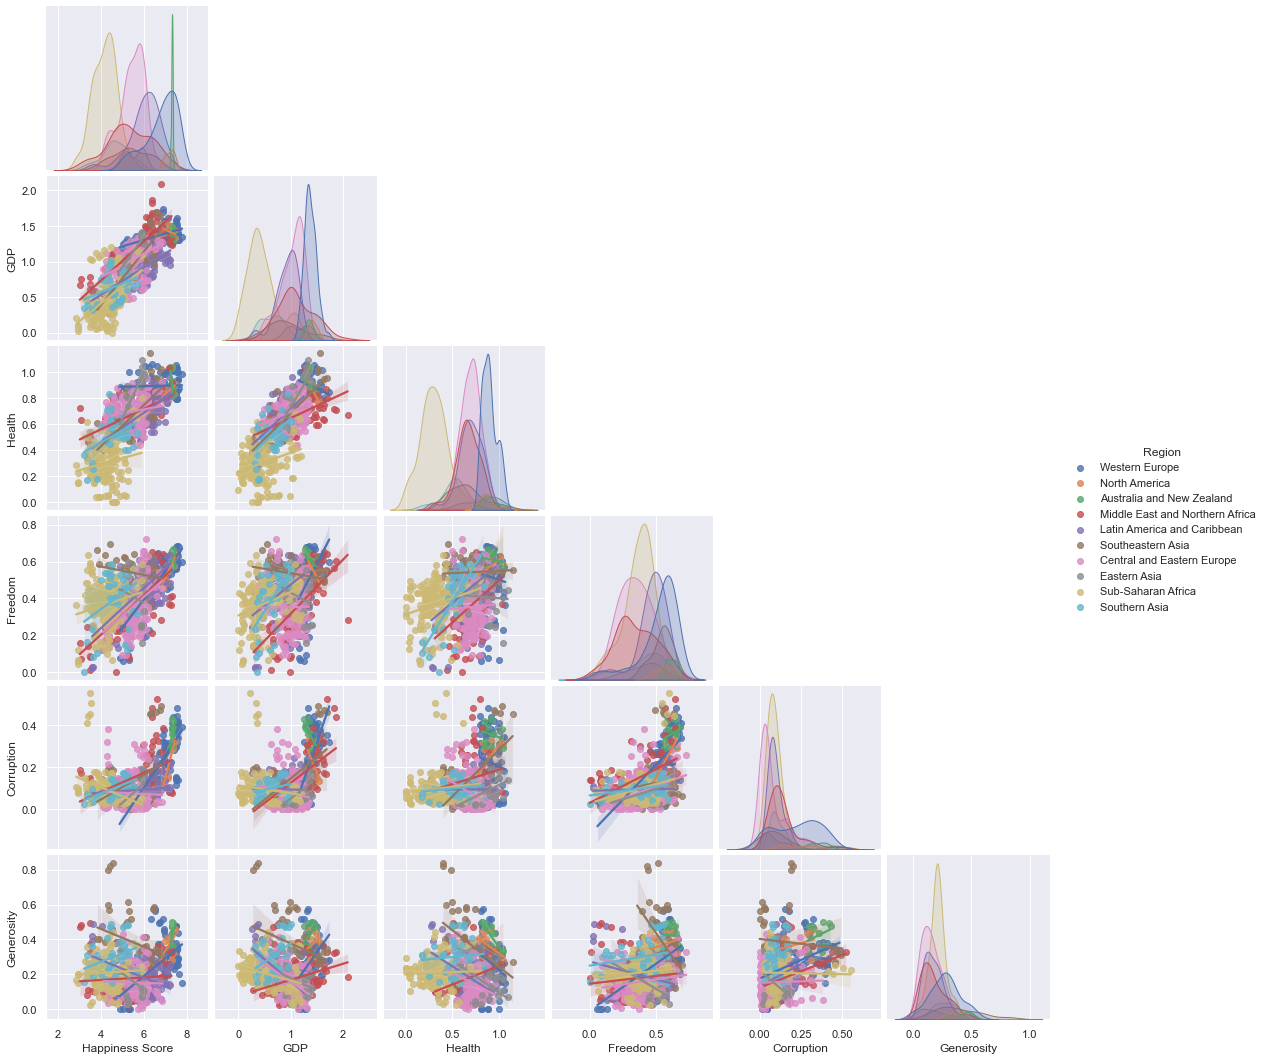

In [40]:
# Бонусный график
sns.pairplot(df[['Happiness Score', 'GDP', 'Health', 'Freedom', 'Corruption', 'Generosity', 'Region']], kind = 'reg', corner = True, hue = 'Region');

Этот график демонстрирует интереснейшие региональные различия:

1) во - первых, становится понятно, что длинный левый хвост гистограмм показателей GDP, Health и интегрального показателя формирует самый несчастный регион Земли - Африка южнее Сахары. 

2) во - вторых, видны регионы, где нет положительной корреляции между интегральным и частными показателями. Например, в Центральной и Восточной Европе, в Латинской Америке нет корреляции между индексом счастья и восприятием коррупции, а в Африке южнее Сахары связь между этими показателями вообще отрицательная. В Юго-Восточной Азии отрицательна связь между свободой и индексом!

3) таким образом, есть масса частных региональных особенностей, возможно, объясняемых культурными отличиями народностей. Было бы интересно их изучить!